In [30]:
# import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
# load data 
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [38]:
# define label mask
mask = data.loc[:,'pass'] == 1

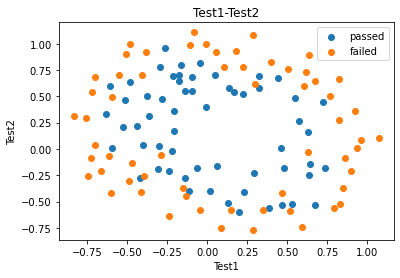

In [39]:
# visualize data
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask], data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask], data.loc[:,'test2'][~mask])

plt.title('Test1-Test2')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend((passed, failed), ('passed','failed'))
plt.show()

In [40]:
# define X and y
X = data.drop(['pass'], axis = 1)
y = data.loc[:, 'pass']
X1 = data.loc[:, 'test1']
X2 = data.loc[:, 'test2']

In [41]:
# generate new data based on test1 and test2
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1, 'X2':X2, 'X1_2':X1_2, 'X2_2':X2_2, 'X1_X2': X1_X2}
X_new = pd.DataFrame(X_new)

In [42]:
# sort X values
X1_new = X1.sort_values()

In [43]:
# set up model
LR2 = LogisticRegression()

In [44]:
# train the model
LR2.fit(X_new, y)

LogisticRegression()

In [45]:
# make a prediction and evaluate the preformance
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

0.8135593220338984


In [52]:
# define method that calculates decision boundaries
def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1, X2_new_boundary2

In [53]:
# calculate the decision boundaries 
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

C:\Users\user\anaconda3\envs\imooc_ai\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\user\anaconda3\envs\imooc_ai\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


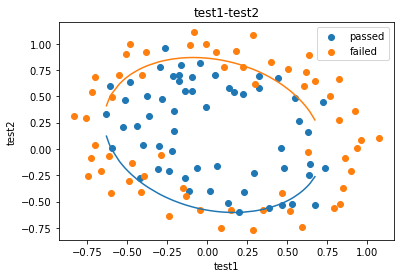

In [56]:
# visualize the 2 decision boundaries with original data
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

plt.plot(X1_new, X2_new_boundary1)
plt.plot(X1_new, X2_new_boundary2)

plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [57]:
# fill in the gap on the graph
X1_range = [-0.9 + x/10000 for x in range(0, 19000)]
X1_range = np.array(X1_range)

X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

C:\Users\user\anaconda3\envs\imooc_ai\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\user\anaconda3\envs\imooc_ai\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


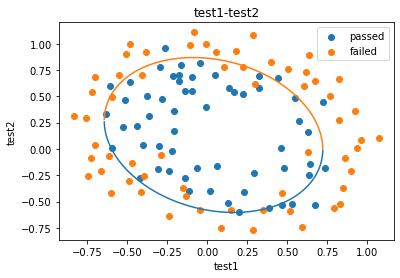

In [60]:
# visualize the compelete graph
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

plt.plot(X1_range, X2_new_boundary1)
plt.plot(X1_range, X2_new_boundary2)

plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()